In [2]:
from annotator import Annotator
from graph_edit_distance import Label_Metrics
from annotation_agreement import AnnotationAgreement
import graphs as gr
import networkx as nx
import numpy as np

tyler = Annotator('tyler', "annotations-TBikaun.json")
daniel = Annotator('daniel', "annotations-danielsantosa.json")
caitlin = Annotator('caitlin', "annotations-caitlinwoods.json")
ziyu = Annotator('ziyu', "annotations-ziyu.zhao.json")
michael = Annotator('michael', "annotations-mstewartuwa.json")
tim = Annotator('tim', "annotations-Tim.json")
melinda = Annotator('melinda', "annotations-mhodki.json")
label = Label_Metrics(ziyu, tyler, caitlin, tim)
label.get_same_doc_ids()
label.same_docs
table = label.create_all_annotations_table()

In [3]:
print(table)

   annotator_id                  token                       label
0          ziyu                 repair                    Activity
1          ziyu                replace                    Activity
2          ziyu  head proximity switch                        Item
3         tyler                 repair                    Activity
4         tyler                replace                    Activity
..          ...                    ...                         ...
9       caitlin                    e/l                      Unsure
10          tim               inverter                        Item
11          tim               tripping  Observation/Observed_state
12          tim                     on                    Location
13          tim                    e/l                        Item

[100 rows x 3 columns]


In [2]:
annotator_nodes = set(table['annotator_id'])
annotator_graphs = AnnotationAgreement.create_annotator_graphs(table, annotator_nodes)
pairwise_ged = Label_Metrics.calculate_pairwise_ged(annotator_graphs, annotator_nodes)
print("Graph Edit Distance between annotators:")
print(pairwise_ged)

Graph Edit Distance between annotators:
{('tyler', 'ziyu'): 0.0, ('tyler', 'tim'): 0.0, ('tyler', 'caitlin'): 0.0, ('ziyu', 'tim'): 0.0, ('ziyu', 'caitlin'): 0.0, ('tim', 'caitlin'): 0.0}


In [3]:
pairwise_reliability = Label_Metrics.calculate_pairwise_reliability(pairwise_ged, annotator_graphs)
print("Pairwise Reliability:")
print(pairwise_reliability)

overall_reliability = Label_Metrics.calculate_overall_reliability(pairwise_reliability)


Pairwise Reliability:
{('tyler', 'ziyu'): 1.0, ('tyler', 'tim'): 1.0, ('tyler', 'caitlin'): 1.0, ('ziyu', 'tim'): 1.0, ('ziyu', 'caitlin'): 1.0, ('tim', 'caitlin'): 1.0}


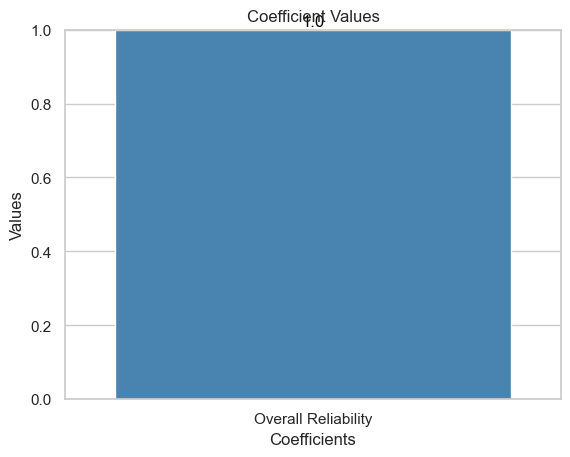

In [4]:
gr.create_bar_chart(overall_reliability, "Coefficients", "Values","Coefficient Values")